# Project 2: Exploratory Data Analysis (EDA)

# Contents 

* [Stage 1. Find and remove duplicate values](#duplicate)
    * [1.1 product_orders data frame](#orders)
    * [1.2 products data frame](#products)
    * [1.3 departments data frame](#departments)
    * [1.4 aisles data frame](#aisles)
    * [1.5 order_products data frame](#order_products)
* [Stage 2. Find and remove missing values](#missing)
    * [2.1 products data frame](#products_two)
    * [2.2 product_orders data frame](#orders_two)
    * [2.3 order_products data frame](#order_products_two)
* [TASK A](#A)
* [TASK B](#B)
* [TASK C](#C)

# Project goal

The goal of this project is to clean up the modified dataset provided from Instacart to prepare a report that gives insight into the shopping habits of Instacart customers.

<a id=duplicate></a>
## Find and remove duplicate values

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

<a id='orders'></a>
### `orders` data frame

In [5]:
# reading instacart_orders.csv file and storing into insta_orders
insta_orders = pd.read_csv('datasets/instacart_orders.csv', sep=';')

# printing information on the data
insta_orders.info()

# print random 5 rows of the dataset
print(insta_orders.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
123462   1259913   164699            77          3                 11   
296083    918085   124417            14          6                  7   
237384   1548759   130417             3          0                 22   
21100     430319   130699             6          6                 17   
330685   2357597    65629            11   

The table contains 6 columns.
According to the documentation: `instacart_orders.csv`: each row corresponds to one order on the Instacart app
- `'order_id'`: ID number that uniquely identifies each order
- `'user_id'`: ID number that uniquely identifies each customer account
- `'order_number'`: the number of times this customer has placed an order
- `'order_dow'`: day of the week that the order placed (which day is 0 is uncertain)
- `'order_hour_of_day'`: hour of the day that the order was placed
- `'days_since_prior_order'`: number of days since this customer placed their previous order

In [6]:
# Check for duplicated orders
print(insta_orders.duplicated().sum())

15


Two methods to check for duplicated orders. `duplicated().sum()` and `value_counts()` on `order_id` confirm validity of the duplicates

In [7]:
insta_orders[insta_orders.duplicated(subset='order_id')]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
#insta_orders[(insta_orders['order_hour_of_day'] == 2) & (insta_orders['order_dow'] == 4)]

#using query to custom filter
insta_orders.query("order_dow == 4 and order_hour_of_day == 2").head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
2124,401544,80955,72,4,2,2.0
14847,1913472,138992,16,4,2,6.0
16116,2796392,154904,12,4,2,13.0
16471,2209130,72786,5,4,2,30.0
32120,2235095,89980,18,4,2,7.0
32426,3400949,76168,2,4,2,25.0
34081,1335087,59328,23,4,2,25.0
39368,605787,52824,37,4,2,1.0
43515,3407108,46375,1,4,2,NaN
45762,2604454,122001,3,4,2,3.0


In [9]:
# Remove duplicate orders
insta_orders = insta_orders.drop_duplicates().reset_index(drop=True)

In [10]:
# Double check for duplicate rows
insta_orders.duplicated().sum()

0

In [11]:
# Double check for duplicate order IDs only
print(insta_orders['order_id'].value_counts())
print(insta_orders['order_id'].duplicated().sum())

1515936    1
2365274    1
336622     1
684027     1
1115132    1
          ..
2578130    1
1034057    1
597364     1
2142471    1
2071924    1
Name: order_id, Length: 478952, dtype: int64
0


Overall impression on the instacart_orders dataset:
- 478967 entries/rows
- types are all int/float, matches what is expected and with the descriptions
- Only missing data is in 'days_of_prior_order', but this could be due to first time orders with no purchase history
- Removed fully duplicated rows

<a id='products'></a>
### `products` data frame

In [12]:
# reading products.csv file and storing into products
products = pd.read_csv('datasets/products.csv', sep=';')

# printing information on the data
products.info()

# print random 5 rows of the dataset
print(products.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
       product_id                       product_name  aisle_id  department_id
44661       44662       Mango Premium Ice Cream Bars        37              1
1511         1512  Berry Flavor Children's Ibuprofen        11             11
6346         6347            Unsweetened Almond Milk        91             16
5977         5978        Decorating Green Cake Icing        97             13
1024         1025                Organic Fresh Basil        16              4


The table contains 4 columns.
According to the documentation: `products.csv`: each row corresponds to a unique product that customers can buy
- `'product_id'`: ID number that uniquely identifies each product
- `'product_name'`: name of the product
- `'aisle_id'`: ID number that uniquely identifies each grocery aisle category
- `'department_id'`: ID number that uniquely identifies each grocery department category

In [13]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [14]:
# Check for just duplicate product IDs
print(products['product_id'].duplicated().sum())

0


In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()

1361

In [17]:
# Check for duplicate product names that aren't missing
tmp = pd.read_csv('datasets/products.csv', sep=';')
tmp['product_lowercase'] = tmp['product_name'].str.lower()

# Count of duplicate product names that aren't missing
print(tmp[(tmp['product_lowercase'].duplicated()) & (~tmp['product_lowercase'].isna())]['product_name'].count())
print()
print(tmp[(tmp['product_lowercase'].duplicated()) & (~tmp['product_lowercase'].isna())].sample(10))

104

       product_id                                       product_name  \
35421       35422  Gentle And Predictable Overnight Relief Laxati...   
44078       44079                                     Blanc de Noirs   
42570       42571                      Fruit Cocktail in Heavy Syrup   
30894       30895                  Chunk Light Tuna in Vegetable Oil   
39296       39297                              Original potato Chips   
15659       15660                                    Cream of Tartar   
47184       47185                  Spreadable Butter with Canola Oil   
32048       32049                    Concentrace Trace Mineral Drops   
41328       41329                           Carrot And Celery Sticks   
46051       46052                  Mountain berry Blast Sports Drink   

       aisle_id  department_id  \
35421        70             11   
44078       134              5   
42570        99             15   
30894        95             15   
39296       107             19  

There are 1258 missing values for product_name, and 104 duplicate product names, indicated above.

Overall impression on the products dataset:
- 49694 entries/rows
- types matches what is expected and with the descriptions
- Missing data is in 'product_name', which needs to be determined why
- No fully duplicated rows in table
- product_name are duplicated, and needs to be explored why. One possible reason is different brands with same product names.

<a id='departments'></a>
### `departments` data frame

In [18]:
# reading departments.csv file and storing into departments
departments = pd.read_csv('datasets/departments.csv', sep=';')

# printing information on the data
departments.info()

# print random 5 rows of the dataset
print(departments.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
    department_id     department
3               4        produce
16             17      household
10             11  personal care
4               5        alcohol
12             13         pantry


The table contains 2 columns.
According to the documentation: `departments.csv`:
- `'department_id'`: ID number that uniquely identifies each grocery department category
- `'department'`: name of the department

In [19]:
# Check for fully duplicated rows
print(departments.duplicated().sum())

# Check for duplicated department_id or department names
print(departments['department_id'].value_counts())
print(departments['department'].str.lower().value_counts())

0
1     1
12    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
2     1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
21    1
Name: department_id, dtype: int64
frozen             1
meat seafood       1
deli               1
snacks             1
babies             1
household          1
dairy eggs         1
canned goods       1
breakfast          1
pantry             1
personal care      1
other              1
bulk               1
dry goods pasta    1
pets               1
beverages          1
international      1
alcohol            1
produce            1
bakery             1
missing            1
Name: department, dtype: int64


Overall impression on the departments dataset:
- 21 entries/rows, no missing data
- types matches what is expected and with the descriptions
- No fully duplicated rows in table, or duplicated names or ID

<a id='aisles'></a>
### `aisles` data frame

In [20]:
# reading /datasets/aisles.csv file and storing into aisles
aisles = pd.read_csv('datasets/aisles.csv', sep=';')

# printing information on the data
aisles.info()

# print random 5 rows of the dataset
print(aisles.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
     aisle_id              aisle
32         33       kosher foods
125       126      feminine care
118       119     frozen dessert
113       114  cleaning products
72         73        facial care


The table contains 2 columns.
According to the documentation: `aisles.csv`:
- `'aisle_id'`: ID number that uniquely identifies each grocery aisle category
- `'aisle'`: name of the aisle

In [21]:
# Check for fully duplicated rows
print(aisles.duplicated().sum())

# Check for duplicated aisle_id or aisle names
print(aisles['aisle_id'].value_counts())
print(aisles['aisle'].str.lower().value_counts())

0
1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: aisle_id, Length: 134, dtype: int64
prepared soups salads         1
food storage                  1
canned fruit applesauce       1
juice nectars                 1
baking supplies decor         1
                             ..
dog food care                 1
seafood counter               1
frozen meals                  1
ice cream ice                 1
specialty wines champagnes    1
Name: aisle, Length: 134, dtype: int64


Overall impression on the aisle dataset:
- 134 entries/rows, no missing data
- types matches what is expected and with the descriptions
- No fully duplicated rows in table, or duplicated names or ID

<a id='order_products'></a>
### `order_products` data frame

In [22]:
# reading /datasets/order_products.csv file and storing into order_products
order_products = pd.read_csv('datasets/order_products.csv', sep=';')

# printing information on the data
order_products.info(show_counts=True)

# print random 5 rows of the dataset
print(order_products.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
         order_id  product_id  add_to_cart_order  reordered
1815235    323505        6341               15.0          1
620580    1794356       27178               16.0          0
3453463     44654       26790               12.0          1
3177483    716917       42828               15.0          0
1271866    808821       13176                1.0          1


The table contains 4 columns.
According to the documentation: `order_products.csv`: each row corresponds to one item placed in an order
- `'order_id'`: ID number that uniquely identifies each order
- `'product_id'`: ID number that uniquely identifies each product
- `'add_to_cart_order'`: the sequential order in which each item was placed in the cart
- `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have

In [23]:
# Check for fully duplicate rows
order_products.duplicated().sum()

0

In [24]:
# Double check for any other tricky duplicates
print(order_products['order_id'].value_counts().head(10))

61355      127
3308010    115
2136777    108
171934     104
1959075     98
1730767     95
102236      95
1800005     92
2926893     92
1386261     91
Name: order_id, dtype: int64


Overall impression on the order_products dataset:
- 4545007 entries/rows
- 'add_to_cart_order' has missing values
- types matches what is expected and with the descriptions
- No fully duplicated rows in table
- 'order_id' has many duplicates, likely meaning one order with multiple items and products

<a id='missing'></a>
## Find and remove missing values

<a id='products_two'></a>
### `products` data frame

In [25]:
# Print out the rows where 'product_name' is missing
product_name_missing = products[products['product_name'].isna()]
print(product_name_missing)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [26]:
# Are all of the missing product names associated with aisle ID 100?
product_name_missing['aisle_id'].value_counts()

100    1258
Name: aisle_id, dtype: int64

Yes, all missing product names are associated with aisle ID 100.

In [27]:
# Are all of the missing product names associated with department ID 21?
product_name_missing['department_id'].value_counts()

21    1258
Name: department_id, dtype: int64

Yes, all missing product names are associated with department ID 21.

In [28]:
# What is this aisle and department?
# Query for aisle_id = 100, and department_id = 21
print(aisles.query("aisle_id == 100"))
print(departments.query("department_id == 21"))

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Department ID 21 and aisle ID 100 are both missing.

In [29]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

In [30]:
# Double check if missing values are filled
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


<a id='orders_two'></a>
### `orders` data frame

In [31]:
# Are there any missing values where it's not a customer's first order?
missing_dspo = insta_orders[insta_orders['days_since_prior_order'].isna()]
print(missing_dspo)

missing_dspo['order_number'].value_counts()

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

1    28817
Name: order_number, dtype: int64

All missing values are when its a customer's first order because the order_number value_counts() matches up with the missing values for days_since_prior_order (28817).

In [32]:
# use query:
insta_orders.query('days_since_prior_order != days_since_prior_order and order_number != 1')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


<a id='order_products_two'></a>
### `order_products` data frame

In [33]:
# What are the min and max values in this column?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


For the `add_to_cart_order`, the min value is 1, and max value is 64.

In [34]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_atco = order_products[order_products['add_to_cart_order'].isna()]['order_id']

In [35]:
# Do all orders with missing values have more than 64 products?
print(missing_atco.value_counts())

61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
888470      1
2621907     1
2729254     1
9310        1
2170451     1
Name: order_id, Length: 70, dtype: int64


All orders do not exceed more than 64 products.

In [36]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [37]:
# Sum up the total missing in add_to_cart_order
total_missing = order_products['add_to_cart_order'].isna().sum()
print(total_missing)

# Reviewer's suggested method to use agg sum and mean
order_products.isna().agg(('sum', 'mean'))

# Replace missing values with 999 and convert column to integer type
#order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')
#order_products.info(show_counts=True)

836


,order_id,product_id,add_to_cart_order,reordered
sum,0.0,0.0,836.000000,0.0
mean,0.0,0.0,0.000184,0.0


There are 836 missing 'add_to_card_order' values, which is a very tiny fraction compared to the whole dataset. 836 / 4545007 = 0.000184 or 0.018% of the data.

<a id='A'></a>
# [A] Tasks

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [38]:
# Checking range of 'order_hour_of_day'
print(insta_orders['order_hour_of_day'].min())
print(insta_orders['order_hour_of_day'].max())
range_hod = insta_orders['order_hour_of_day'].max() - insta_orders['order_hour_of_day'].min()
print('The range for `order_hour_of_day` is ', range_hod)

0
23
The range for `order_hour_of_day` is  23


In [39]:
# Checking range of 'order_dow'
print(insta_orders['order_dow'].min())
print(insta_orders['order_dow'].max())
range_dow = insta_orders['order_dow'].max() - insta_orders['order_dow'].min()
print('The range of `order_dow` is ', range_dow)

0
6
The range of `order_dow` is  6


`order_hour_of_day` is verified to range from a min value of 0 to a max value of 23. This represents each hour of a day and makes sense for this data set.

`order_dow` is verified to range from a min value of 0 to a max value of 6. The value represents each day of the week, Monday, Tuesday, Wednesday, etc., and is valid for this data set.

In [40]:
sorted(insta_orders['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]

### [A2] What time of day do people shop for groceries?
Create a plot that shows how many people place orders for each hour of the day.

In [41]:
# Count the number of orders per hour of the day
orders_placed_timeofday = insta_orders.groupby('order_hour_of_day')['order_id'].count()
print(orders_placed_timeofday)

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


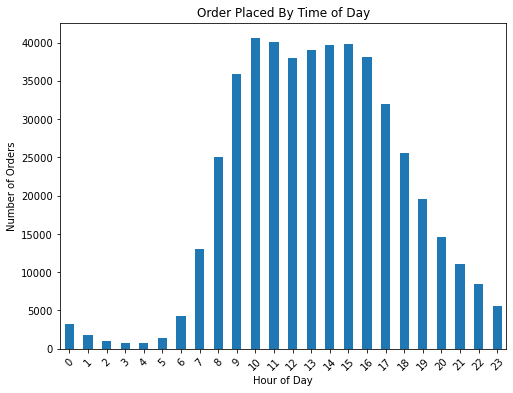

In [42]:
# Plot as a bar chart
orders_placed_timeofday.plot(kind='bar',
                            rot=45,
                            xlabel='Hour of Day',
                            ylabel='Number of Orders',
                            figsize=[8,6],
                            title='Order Placed By Time of Day')
plt.show()

Based from this plot, most people shop for groceries around 10 am through 3 or 4 PM. 

We see that the orders are very low or quiet after midnight (from 0-5), which makes sense since people are sleeping and likely stores are closed unable to take orders. As morning starts, there are the early morning shoppers which starts the influx of orders. This rises to a peaks toward the late morning and holds constant until the afternoon. There is then a steady decline of orders throughout the evening.

### [A3] What day of the week do people shop for groceries?

In [43]:
# Count the number of orders per day of the week
orders_placed_dow = insta_orders.groupby('order_dow')['order_id'].count()
print(orders_placed_dow)

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


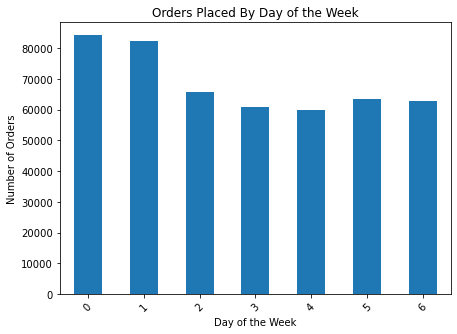

In [44]:
# Plot as a bar chart
orders_placed_dow.plot(kind='bar',
                       rot=45,
                       xlabel='Day of the Week',
                       ylabel='Number of Orders',
                       figsize=[7,5],
                       title='Orders Placed By Day of the Week')
plt.show()

From this plot, since previously it wasn't specified which integer corresponds to which day of the week, it can be inferred that 0 and 1 represents Saturday and Sunday, while 2-6 represents the weekdays. This is because more orders are generally placed on weekends over weekdays. This would make the starting day as Saturday (0) through Friday (6).

Broadly speaking, people tend to shop much more on the weekends over the weekdays. People placed more orders on Saturdays over Sundays. When comparing between the weekdays, Wednesday is the weakest shopping day, while Monday has the highest.

### [A4] How long do people wait until placing another order?

In [45]:
# Find the max number in the data of days since last order
print(insta_orders['days_since_prior_order'].max())

30.0


In [46]:
# Count the number of orders per days since prior order
days_spo = insta_orders.groupby('days_since_prior_order')['order_id'].count()
print(days_spo)

days_since_prior_order
0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: order_id, dtype: int64


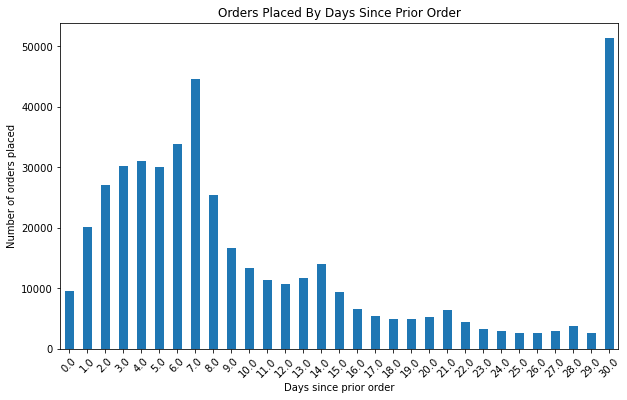

In [47]:
# Plot as a bar chart
days_spo.plot(kind='bar',
              xlabel='Days since prior order',
              ylabel='Number of orders placed',
              figsize=[10,6],
              rot=45,
              title='Orders Placed By Days Since Prior Order')
plt.show()

Days since prior order has a minimum value of 0 and a maximum value of 30. A min value of 0 suggests that their last order was placed on the same day as the data collection. For the maximum value of 30, because of the large amount of orders placed in this category, it suggests that it is more appropriate to say the max value represents the sum of 30+ days since prior order. 

From the graph, most people would have at least up to one week before placing another order. If not, after day 7/8, the number of orders placed starts going down for placing another order. Behaviorally, this is reasonable as most people replenish the groceries weekly, and this fits in this timeline.

<a id='B'></a>
# [B] Task

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [48]:
# Filter by orders for Saturdays (dow=0)
sat_orders = insta_orders.query("order_dow == 0")['order_hour_of_day']

In [49]:
# Filter by orders for Wednesdays (dow=4)
wed_orders = insta_orders.query("order_dow == 4")['order_hour_of_day']

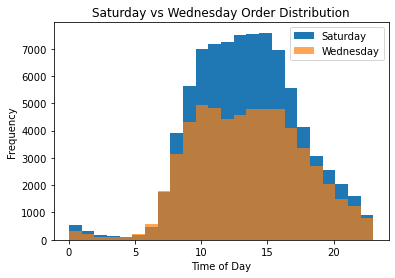

In [50]:
sat_orders.plot(kind='hist', bins=24)
wed_orders.plot(kind='hist', bins=24, alpha=0.7)
plt.legend(['Saturday', 'Wednesday'])
plt.xlabel('Time of Day')
plt.title('Saturday vs Wednesday Order Distribution')
plt.show()

There is no apparent distribution differences between orders placed on Wednesdays or Saturdays. The peak ordering times are look generally similar. The main difference is the volume of orders, as there are many more orders placed on Saturday than on Wednesday.

### [B2] What's the distribution for the number of orders per customer?

In [51]:
# Count the number of unique order_id per user_id
cust_orders = insta_orders.groupby('user_id')['order_id'].nunique()

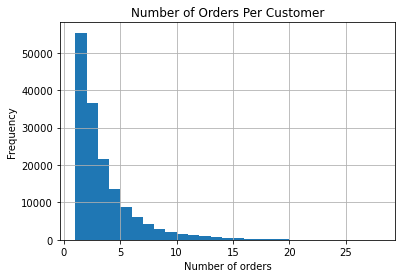

In [52]:
# Plot distribution for number of orders per customer
cust_orders.hist(bins=27)
plt.xlabel('Number of orders')
plt.ylabel('Frequency')
plt.title('Number of Orders Per Customer')
plt.show()

Max number of orders per customer is 28. 

### [B3] What are the top 20 popular products (display their id and name)?

In [53]:
# Merge order_products and products file on product_id to collect the product_name
merged_orders = order_products.merge(products,
                             how='left',
                             on='product_id')
merged_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
 4   product_name       object 
 5   aisle_id           int64  
 6   department_id      int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 277.4+ MB


In [54]:
# Remove unrelated columns
merged_clean = merged_orders.drop(['order_id', 'add_to_cart_order', 'reordered', 'aisle_id', 'department_id'], axis='columns')

merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   product_id    int64 
 1   product_name  object
dtypes: int64(1), object(1)
memory usage: 104.0+ MB


In [55]:
# Store the top 20 ordered items index
top20_index = merged_clean['product_id'].value_counts()[0:20].index.tolist()
print(top20_index)

[24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845, 27966, 22935, 24964, 45007, 39275, 49683, 28204, 5876, 8277, 40706]


In [56]:
# Returns the given index number (rank) or the product_id in the index
def ranking(product):
    if product in top20_index:
        return top20_index.index(product) + 1
    else:
        return 99

In [57]:
# Creates new ranking column
merged_clean['ranking'] = merged_clean['product_id'].apply(ranking)

In [58]:
# Removes duplicate product_id rows
merged_clean = merged_clean.drop_duplicates(subset='product_id').reset_index(drop=True)

In [59]:
a = merged_clean
a.set_index('ranking', inplace=True)
print(a.sort_index().head(20))

         product_id              product_name
ranking                                      
1             24852                    Banana
2             13176    Bag of Organic Bananas
3             21137      Organic Strawberries
4             21903      Organic Baby Spinach
5             47209      Organic Hass Avocado
6             47766           Organic Avocado
7             47626               Large Lemon
8             16797              Strawberries
9             26209                     Limes
10            27845        Organic Whole Milk
11            27966       Organic Raspberries
12            22935      Organic Yellow Onion
13            24964            Organic Garlic
14            45007          Organic Zucchini
15            39275       Organic Blueberries
16            49683            Cucumber Kirby
17            28204        Organic Fuji Apple
18             5876             Organic Lemon
19             8277  Apple Honeycrisp Organic
20            40706    Organic Gra

Top 20 ordered items include a lot of fruits and vegetables!

In [60]:
(order_products
 .merge(products, how='left', on='product_id')
 
 # let's group by id and product name: 
 .groupby(['product_id','product_name'])
 
 # and calculate the number of orders: 
 .agg(number_of_orders = ('order_id','count'))
 
 # reset index
 .reset_index()
 
 # sort values: 
 .sort_values(by = 'number_of_orders', ascending = False)
).head(20)

,product_id,product_name,number_of_orders
22808,24852,Banana,66050
12025,13176,Bag of Organic Bananas,53297
19370,21137,Organic Strawberries,37039
20077,21903,Organic Baby Spinach,33971
43271,47209,Organic Hass Avocado,29773
43788,47766,Organic Avocado,24689
43663,47626,Large Lemon,21495
15364,16797,Strawberries,20018
24047,26209,Limes,19690
25556,27845,Organic Whole Milk,19600


<a id='C'></a>
# [C] Tasks

### [C1] How many items do people typically buy in one order? What does the distribution look like?

The minimum item per order is 1 and the maximum item per order is 127


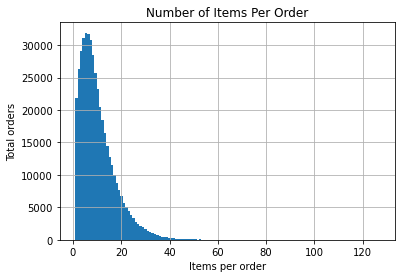

In [61]:
# Counting the number of items per unique order_id
items_per_order = order_products.groupby('order_id')['product_id'].count()

ipo_min = items_per_order.min()
ipo_max = items_per_order.max()
ipo_mean = items_per_order.mean()
print(f'The minimum item per order is {ipo_min} and the maximum item per order is {ipo_max}')

# Plotting distribution of items per order
items_per_order.hist(bins=128)
plt.xlabel('Items per order')
plt.ylabel('Total orders')
plt.title('Number of Items Per Order')
plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [62]:
# Remove unrelated columns from the merged data set 
merged_clean2 = merged_orders.drop(['add_to_cart_order', 'aisle_id', 'department_id'], axis='columns')

merged_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      int64 
 1   product_id    int64 
 2   reordered     int64 
 3   product_name  object
dtypes: int64(3), object(1)
memory usage: 173.4+ MB


In [63]:
# Filter by reordered = 1
reordered_list = merged_clean2.query("reordered == 1")

In [64]:
# Group by product_id and product_name, sort by number of orders
grp = reordered_list.groupby(['product_id', 'product_name'])
print(grp.agg(number_of_orders = ('order_id', 'count')).sort_values(by='number_of_orders', ascending=False).head(20))

                                     number_of_orders
product_id product_name                              
24852      Banana                               55763
13176      Bag of Organic Bananas               44450
21137      Organic Strawberries                 28639
21903      Organic Baby Spinach                 26233
47209      Organic Hass Avocado                 23629
47766      Organic Avocado                      18743
27845      Organic Whole Milk                   16251
47626      Large Lemon                          15044
27966      Organic Raspberries                  14748
16797      Strawberries                         13945
26209      Limes                                13327
22935      Organic Yellow Onion                 11145
24964      Organic Garlic                       10411
45007      Organic Zucchini                     10076
49683      Cucumber Kirby                        9538
28204      Organic Fuji Apple                    8989
8277       Apple Honeycrisp 

The top 20 reordered list, is very similar to the top 20 popular items overall.

### [C3] For each product, what proportion of its orders are reorders?

In [65]:
# Total of all products ordered (reordered = 1 and 0)
total_ordered = merged_clean2.groupby('product_id')['reordered'].count() 

# Total for reordered items
total_reordered = merged_clean2.groupby('product_id')['reordered'].sum()

# Calculate the proportion reordered
proportion_reordered = total_reordered / total_ordered

# Removes duplicate product_id rows
merged_clean2 = merged_clean2.drop_duplicates(subset='product_id').reset_index(drop=True).sort_values(by='product_id')

# Drop reordered column
merged_clean2 = merged_clean2.drop(['reordered'], axis='columns')

# Set index as the product_id
merged_clean2.set_index('product_id', inplace=True)

# Add the proportion reordered column
merged_clean2['reorder_prop'] = proportion_reordered

# Print list of top sorted by reordered proportion
print(merged_clean2.sort_values(by='reorder_prop', ascending=False).head(20))

print(order_products.query("product_id == 20949"))
print(order_products.query("product_id == 35137"))

            order_id                                       product_name  \
product_id                                                                
14721         938604                            Bone Strength Take Care   
20949        2318804                           Vanilla Sandwich Cookies   
6723         1130818                                   Palmiers- Petite   
6732          971050                  Naturally Sparkling Mineral Water   
45088        2374782  California Dill Pollen & Garlic Goat Cheese & ...   
45078         917112                                       Pomegranatea   
21016        1688632       Parchment Lined 8 in x 3.75 in x 2.5 in Pans   
21005          72892                        Peanut Butter Pie Ice Cream   
35192        1542460                         Chocolate Soy Milk Singles   
35197        2964621  Mocha Chocolate Chip  Organic Non-Dairy Frozen...   
6810          804500                        Raspberry Goji Paleo Prints   
45040        2090094     

The above output looks weird because having a reorder ratio of 1.0 means we're missing data where the item was purchased for the first time. Looking into the data and finding the rows with these specific product_ids show that indeed only the reorders for these items are shown in the orders. Thus, even though this is a flaw in the data, I decided to remove all results with a reorder_prop of 1.

In [66]:
# Filter of reorder proportions equal to 1 and select everything less than 1
new_mergedclean = merged_clean2.query("reorder_prop < 1")

# Printing table
print(new_mergedclean)

            order_id                                       product_name  \
product_id                                                                
1            1104373                         Chocolate Sandwich Cookies   
2             228831                                   All-Seasons Salt   
3            2851416               Robust Golden Unsweetened Oolong Tea   
4            2528717  Smart Ones Classic Favorites Mini Rigatoni Wit...   
7            1806224                     Pure Coconut Water With Orange   
...              ...                                                ...   
49690         546670                      HIGH PERFORMANCE ENERGY DRINK   
49691        2913727                      ORIGINAL PANCAKE & WAFFLE MIX   
49692        2628295    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49693         715220                             SPRING WATER BODY WASH   
49694         289487                            BURRITO- STEAK & CHEESE   

            reorder_prop

In [67]:
# Statistics on the reorder column
new_mergedclean.describe()

,order_id,reorder_prop
count,4.376400e+04,43764.000000
mean,1.718717e+06,0.361356
std,9.850918e+05,0.246833
min,1.100000e+01,0.000000
25%,8.700835e+05,0.153846
50%,1.721617e+06,0.400000
75%,2.571466e+06,0.554720
max,3.420890e+06,0.952381


We can use the table to lookup the reorder percentage given a particular product_id or product_name. From the statistics and looking at all of the items, the average rate for items have a 36.1% for reorder.

### [C4] For each customer, what proportion of their products ordered are reorders?

The thought process here is to merge the order_products with the instacart_orders to bring in the necessary column information (user_id and reordered). Then to a similar approach as to question C3, we can groupby the user_id (unique to the customer) and calculate the proportion of reorders per item.

In [68]:
# Merge order_products and instacart_orders file on order_id to collect the user_id
merged_custorders = order_products.merge(insta_orders,
                             how='left',
                             on='order_id')
merged_custorders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       float64
 3   reordered               int64  
 4   user_id                 int64  
 5   order_number            int64  
 6   order_dow               int64  
 7   order_hour_of_day       int64  
 8   days_since_prior_order  float64
dtypes: float64(2), int64(7)
memory usage: 346.8 MB


In [69]:
# Remove unrelated columns from the merged data set 
merged_clean4 = merged_custorders.drop(['add_to_cart_order', 
                                        'order_number', 
                                        'order_dow', 
                                        'order_hour_of_day',
                                        'days_since_prior_order'], axis='columns')

In [70]:
# Total of all products ordered by user_id (reordered = 1 and 0)
tot_ord = merged_clean4.groupby('user_id')['reordered'].count() 

# Total for reordered items by user_id
tot_reord = merged_clean4.groupby('user_id')['reordered'].sum()

pro_reord = tot_reord / tot_ord

print(pro_reord)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


In [71]:
# Removes duplicate product_id rows
merged_clean4 = merged_clean4.drop_duplicates(subset='user_id').reset_index(drop=True).sort_values(by='user_id')

In [72]:
# Set index as the user_id
merged_clean4.set_index('user_id', inplace=True)

In [73]:
# Add the proportion reordered column
merged_clean4['reorder_prop'] = pro_reord

In [74]:
# Printing table
print(merged_clean4)

         order_id  product_id  reordered  reorder_prop
user_id                                               
2         2168274       32792          0      0.038462
4         2030307       42329          0      0.000000
5          157374       11777          1      0.666667
6         2086598       48679          0      0.000000
7          369015       23712          1      0.928571
...           ...         ...        ...           ...
206203     395144       26209          1      0.222222
206206    2475308       21711          1      0.714286
206207       9620       44632          1      0.891304
206208    3128968       27966          1      0.696000
206209     688306       40992          0      0.320000

[149626 rows x 4 columns]


Text(0.5, 1.0, "Customers' Item Reorder Distribution")

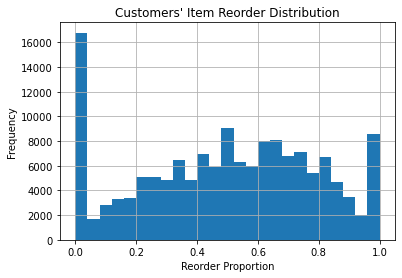

In [75]:
# Plot histogram of each user's reordered proportions
merged_clean4['reorder_prop'].hist(bins=25)
plt.xlabel('Reorder Proportion')
plt.ylabel('Frequency')
plt.title('Customers\' Item Reorder Distribution')

This shows the distribution of what proportion of customers' items are reorders.

In [76]:
print("The initial number of users:", merged_custorders.user_id.nunique())
print("The number of users in the final data:", merged_clean4.reset_index().user_id.nunique())

The initial number of users: 149626
The number of users in the final data: 149626


### [C5] What are the top 20 items that people put in their carts first? 

The idea here is to calculate the ratio of items ordered and when the item is first placed into people's carts. To figure this proportion out, we need to calculate:
- the total number of times the item has been ordered
- the total number of times the item was placed first in the cart

Then rank by this ratio.

In [77]:
# Remove unrelated columns from the merged data set 
merged_clean5 = merged_orders.drop(['reordered', 'aisle_id', 'department_id'], axis='columns')

merged_clean5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   product_name       object 
dtypes: float64(1), int64(2), object(1)
memory usage: 173.4+ MB


In [78]:
# Filter by add_to_cart_order = 1
addtocart_list = merged_clean5.query("add_to_cart_order == 1")

In [79]:
group = addtocart_list.groupby(['product_id', 'product_name'])
print(group.agg(number_of_orders = ('order_id', 'count')).sort_values('number_of_orders').head(20))

                                                               number_of_orders
product_id product_name                                                        
24786      No More Tangles Detangling Spray                                   1
35262      No Drip Foam Mold and Mildew Stain Remover with...                 1
35254      Black Pepper Croccantini                                           1
35252      Mediterranean Chickpea Veggie Burgers                              1
35246      6.25 Oz LifeSavers Wintogreen Peg                                  1
35245      Vitamin E Stick                                                    1
14873      Fruit Cocktail In Heavy Syrup                                      1
35240      Sweet Potato Pie                                                   1
35271      100% Colombian Ground Medium Dark Coffee                           1
14878      California Ripe Sliced Olives                                      1
35229      Bean & Cheese Burritos       

In [80]:
group.agg(number_of_orders = ('order_id', 'count')).sort_values('number_of_orders', ascending = False).head(20)

,,number_of_orders
product_id,product_name,
24852,Banana,15562
13176,Bag of Organic Bananas,11026
27845,Organic Whole Milk,4363
21137,Organic Strawberries,3946
47209,Organic Hass Avocado,3390
21903,Organic Baby Spinach,3336
47766,Organic Avocado,3044
19660,Spring Water,2336
16797,Strawberries,2308
